# <span style="color:red">@@@@@@@@@@@@ Ayad @@@@@@@@@@@@</span>

# <span style="color:Blue">Data</span>

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(f"The shape of the training data is {X_train.shape}, and its response shape is {y_train.shape}")
print(f"The shape of the testing data is {X_test.shape}, and its response shape is {y_test.shape}")

The shape of the training data is (60000, 28, 28), and its response shape is (60000,)
The shape of the testing data is (10000, 28, 28), and its response shape is (10000,)


In [5]:
X_train.dtype

dtype('uint8')

In [6]:
X_train = X_train.astype('float64')
X_test  =  X_test.astype('float64')
X_test.dtype

dtype('float64')

In [7]:
X_train = X_train/255.0
X_test  = X_test /255.0

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('dark_background')

C:\Users\__Ayad__\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

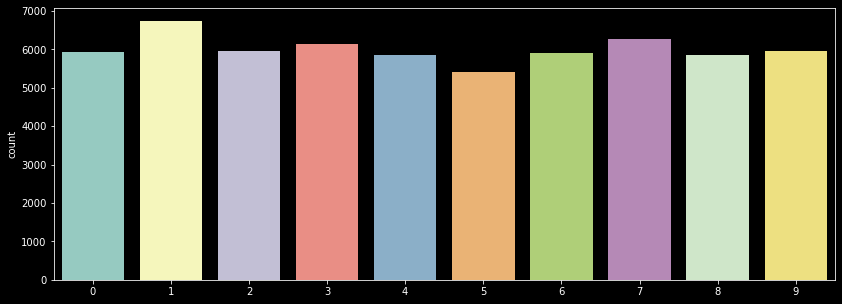

In [9]:
plt.figure(figsize=(14, 5))
sns.countplot(y_train)

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test , 10)

# <span style="color:Blue">CNNs and layers designing</span>

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [13]:
model = Sequential([
    
    Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(2),
    Dropout(0.25),
    Flatten(),
    Dense(128, 'relu'),
    Dropout(0.5),
    Dense(10, 'softmax')
    
])

In [14]:
from tensorflow.keras.optimizers import Adam

In [15]:
model.compile(optimizer = Adam(),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [16]:
import time

In [17]:
tic = time.time()
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=[X_test, y_test])
toc = time.time()

print("\n\n\n", f"Elapsed time for model training : {round((toc-tic)/60, 2)} minutes")

Epoch 1/5
469/469 [==============================] - 66s 140ms/step - loss: 0.2314 - accuracy: 0.9292 - val_loss: 0.0522 - val_accuracy: 0.9824
Epoch 2/5
469/469 [==============================] - 66s 142ms/step - loss: 0.0810 - accuracy: 0.9760 - val_loss: 0.0402 - val_accuracy: 0.9862
Epoch 3/5
469/469 [==============================] - 67s 143ms/step - loss: 0.0592 - accuracy: 0.9816 - val_loss: 0.0295 - val_accuracy: 0.9907
Epoch 4/5
469/469 [==============================] - 67s 143ms/step - loss: 0.0493 - accuracy: 0.9845 - val_loss: 0.0307 - val_accuracy: 0.9904
Epoch 5/5
469/469 [==============================] - 66s 142ms/step - loss: 0.0434 - accuracy: 0.9860 - val_loss: 0.0335 - val_accuracy: 0.9892



 Elapsed time for model training : 5.55


In [18]:
score = model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0335 - accuracy: 0.9892


In [19]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.033522337675094604
Test accuracy: 0.9891999959945679


In [51]:
plt.style.use('classic')
import pandas as pd

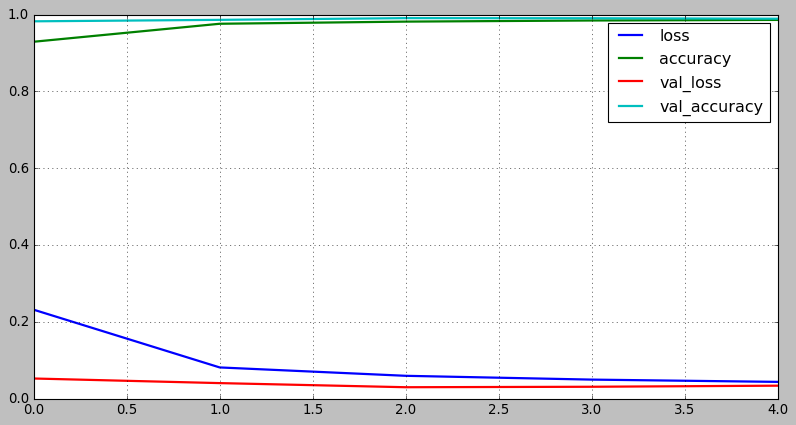

In [52]:
pd.DataFrame(history.history).plot(figsize=(12, 6), lw=2)
plt.grid(True)
plt.show()

In [22]:
import numpy as np

In [23]:
np.argmax(y_test[60])

7

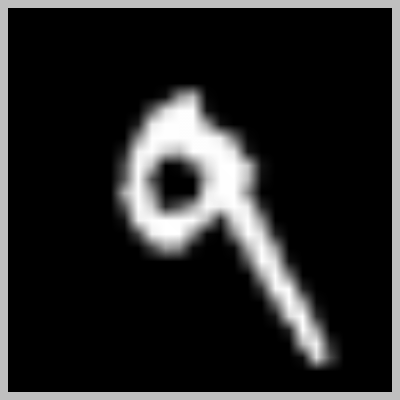

In [101]:
plt.imshow(X_test[7], 'gray')
plt.axis('off')
plt.show()

In [78]:
import tensorflow as tf

In [105]:
sample = tf.convert_to_tensor(X_test[7])
sample.shape

TensorShape([28, 28])

In [106]:
sample = sample[tf.newaxis, :, :, tf.newaxis]
sample.shape

TensorShape([1, 28, 28, 1])

In [108]:
np.argmax(model.predict(sample))

9

# <span style="color:Blue">PCA and dimensionality reduction</span>

In [111]:
from sklearn.decomposition import PCA

In [110]:
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
    OUTPUT: None
    '''
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [176]:
def fit_random_forest_classifier(X, y):
    '''
    INPUT: names are pretty self explanatory
    OUTPUT: none - prints the confusion matrix and accuracy
    '''
    #First let's create training and testing data
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, random_state=42)

    #We could grid search and tune, but let's just fit a simple model to see how it does
    #instantiate
    clf = RandomForestClassifier(n_estimators=100, max_depth=None)

    #fit
    clf.fit(Xtrain, ytrain)

    #predict
    ypreds = clf.predict(Xtest)

    #score
#     mat = confusion_matrix(y_test, y_preds)
#     print(mat)
#     print(sns.heatmap(mat, annot=True, cmap='bwr', linewidths=.5))
    acc = accuracy_score(ytest, ypreds)
#     print(acc)
    return acc

In [114]:
X_train_ = X_train.reshape(60000, 784)
X_train_.shape

(60000, 784)

In [123]:
y_train_ = np.argmax(y_train, 1)
y_train_.shape

(60000,)

In [124]:
X_test_ = X_test.reshape(10000, 784)
y_test_ = np.argmax(y_test, 1)

In [128]:
tic = time.time()

for component in range(1, 3659874):
    pca = PCA(component)
    X_pca = pca.fit_transform(X_train_)
    if pca.explained_variance_ratio_.sum() >= 0.85:
        num_comps = pca.n_components
        break
        
print("The number of components providing more than 85% of variance explained are " + str(num_comps))

toc = time.time()

print("\n\n", f"Elapsed time : {round((toc-tic)/60, 2)} minutes")

The number of components providing more than 85% of variance explained are 59


 Elapsed time for model training : 2.31 minutes


In [129]:
pca = PCA(59)
X_pca = pca.fit_transform(X_train_)
X_pca.shape

(60000, 59)

In [138]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [146]:
plt.style.use('default')

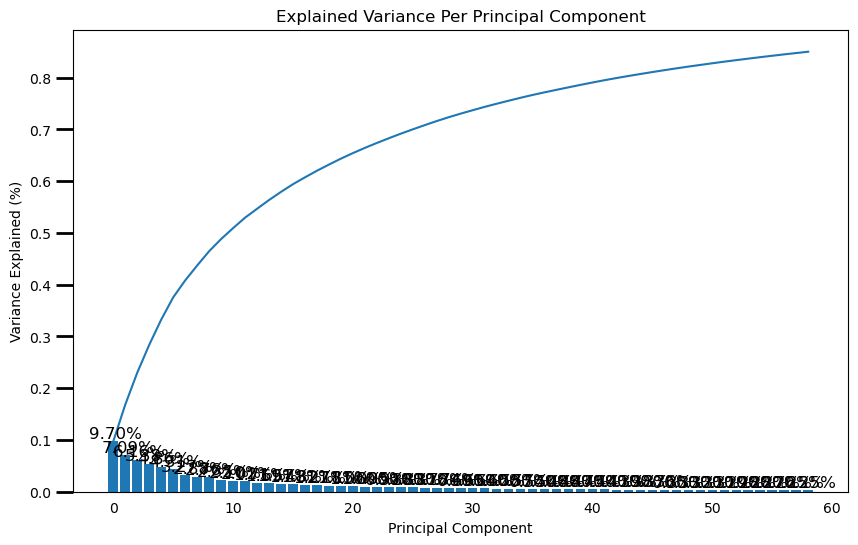

In [147]:
scree_plot(pca)

In [177]:
tic = time.time()

acc = fit_random_forest_classifier(X_train_, y_train_)

toc = time.time()

print(f"\n\nElapsed time for model training before PCA : {round((toc-tic)/60, 2)} minutes")
print()
print("\n\nAnd the accuracy is {}%\n\n".format(round(acc*100, 2)))



Elapsed time for model training before PCA : 0.5 minutes



And the accuracy is 96.53%




In [178]:
tic = time.time()

fit_random_forest_classifier(X_pca, y_train_)

toc = time.time()

print(f"\n\nElapsed time for model training after PCA : {round((toc-tic)/60, 2)} minutes")
print()
print("\n\nAnd the accuracy is {}%\n\n".format(round(acc*100, 2)))



Elapsed time for model training after PCA : 0.6 minutes



And the accuracy is 96.53%




# <span style="color:Blue">Choosing the Right Number of Dimensions</span>

Instead of arbitrarily choosing the number of dimensions to reduce down to, it is
simpler to choose the number of dimensions that add up to a sufficiently large por‐
tion of the variance (e.g., 95%). Unless, of course, you are reducing dimensionality for
data visualization—in that case you will want to reduce the dimensionality down to 2
or 3.
The following code performs PCA without reducing dimensionality, then computes
the minimum number of dimensions required to preserve 95% of the training set’s
variance:

In [168]:
pca = PCA()
pca.fit(X_train_)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

You could then set n_components=d and run PCA again.
<br>But there is a much better
option: instead of specifying the number of principal components you want to preserve, you can set n_components to be a float between 0.0 and 1.0, indicating the ratio
of variance you wish to preserve:

In [170]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train_)

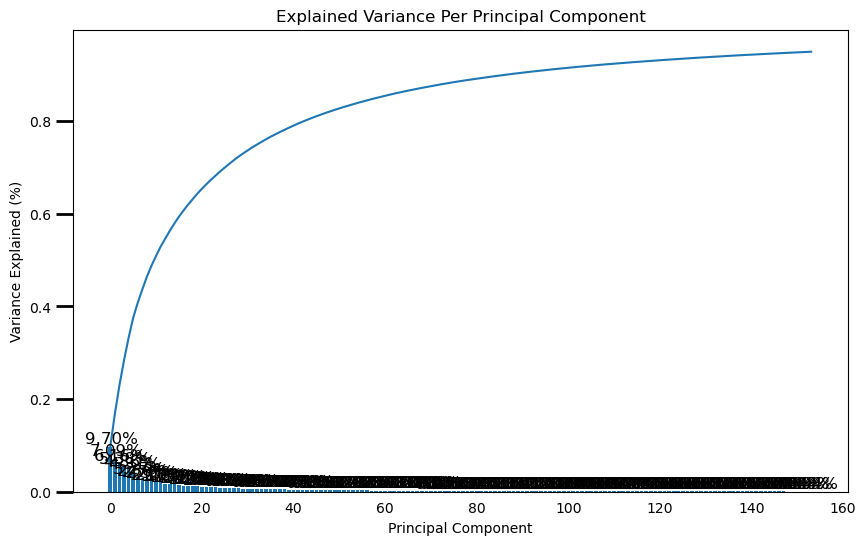

In [171]:
scree_plot(pca)

In [173]:
tic = time.time()

fit_random_forest_classifier(X_reduced, y_train_)

toc = time.time()

print(f"\n\nElapsed time for model training after PCA (95% explained variance ratio) : {round((toc-tic)/60, 2)} minutes")
print()
print("\n\nAnd the accuracy is {}%\n\n".format(round(acc*100, 2)))



Elapsed time for model training after PCA (95% explained variance ratio) : 1.06 minutes



And the accuracy is 96.59%




From this section, you have had an opportunity to look at the two major parts of PCA:

`I.` The amount of **variance explained by each component**.  This is called an **eigenvalue**.

`II.` The principal components themselves, each component is a vector of weights.  In this case, the principal components help us understand which pixels of the image are most helpful in identifying the difference between digits. **Principal components** are also known as **eigenvectors**.

# <span style="color:red">@@@@@@@@@@@@ Ayad @@@@@@@@@@@@</span>